# 1 Matrix operations

## 1.1 Create a 4*4 identity matrix

In [1]:
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# create a 4*4 identity matrix 
I = [[1, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 1]]

## 1.2 get the width and height of a matrix. 

In [2]:
# Get the height and weight of a matrix.
def shape(M):
    if M == None or not M:
       return 0,0 
    return len(M), len(M[0])

In [3]:
# run following code to test your shape function
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 round all elements in M to certain decimal points

In [4]:
# round all elements in M to decPts
def matxRound(M, decPts=4):
    x,y = shape(M)
    for i in range(x):
        for j in range(y):
            M[i][j] = round(M[i][j], decPts)

In [5]:
# run following code to test your matxRound function
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.052s

OK


## 1.4 compute transpose of M

In [6]:
#compute transpose of M
def transpose(M):
    x,y = shape(M)
    N = []
    for i in range(y):
        N.append([0]*x)
        for j in range(x):
            N[i][j] = M[j][i]
    return N

In [7]:
transpose(B)

[[1, 2, 1], [2, 3, 2], [3, 3, 5], [5, 5, 1]]

In [8]:
# run following code to test your transpose function
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.020s

OK


## 1.5 compute AB. return None if the dimensions don't match

In [9]:
#compute matrix multiplication AB, return None if the dimensions don't match
def matxMultiply(A, B):
    xa,ya = shape(A)
    xb,yb = shape(B)
   
    if ya != xb:
        raise ValueError()
    
    M = [];
    for i in range(xa):
        M.append([])
        for k in range(yb):
            s = 0
            for j in range(ya):
                s += A[i][j] * B[j][k]
            M[i].append(s)
    return M

In [10]:
# run following code to test your matxMultiply function
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.110s

OK


---

# 2 Gaussian Jordan Elimination

## 2.1 Compute augmented Matrix 

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

Return $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [11]:
# construct the augment matrix of matrix A and column vector b, assuming A and b have same number of rows
def augmentMatrix(A, b):
    xa,ya = shape(A)
    xb,yb = shape(b)
    
    M = []
    
    for i in range(xa):
        M.append([])
        for j in range(ya):
            M[i].append(A[i][j])
    
    for i in range(xb):
        for j in range(yb):
            M[i].append(b[i][j])
    return M

In [12]:
# run following code to test your augmentMatrix function
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


## 2.2 Basic row operations
- exchange two rows
- scale a row
- add a scaled row to another

In [13]:
# in-place operation, no return value
def swapRows(M, r1, r2):
    x = M[r1]
    M[r1] = M[r2]
    M[r2] = x

In [14]:
# run following code to test your swapRows function
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [15]:
# in-place operation, no return value
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError()
    M[r] = [v * scale for v in M[r]]

In [16]:
# run following code to test your scaleRow function
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [17]:
# r1 <--- r1 + r2*scale
# in-place operation, no return value
def addScaledRow(M, r1, r2, scale):
    M[r1] = [v + M[r2][i]*scale for i,v in enumerate(M[r1])]

In [18]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gauss-jordan method to solve Ax = b

### Hint：

Step 1: Check if A and b have same number of rows
Step 2: Construct augmented matrix Ab

Step 3: Column by column, transform Ab to reduced row echelon form [wiki link](https://en.wikipedia.org/wiki/Row_echelon_form#Reduced_row_echelon_form)
    
    for every column of Ab (except the last one)
        column c is the current column
        Find in column c, at diagonal and under diagonal (row c ~ N) the maximum absolute value
        If the maximum absolute value is 0
            then A is singular, return None （Prove this proposition in Question 2.4）
        else
            Apply row operation 1, swap the row of maximum with the row of diagonal element (row c)
            Apply row operation 2, scale the diagonal element of column c to 1
            Apply row operation 3 mutiple time, eliminate every other element in column c
            
Step 4: return the last column of Ab

### Remark：
We don't use the standard algorithm first transfering Ab to row echelon form and then to reduced row echelon form.  Instead, we arrives directly at reduced row echelon form. If you are familiar with the stardard way, try prove to yourself that they are equivalent. 

In [19]:
#implement gaussian jordan method to solve Ax = b

""" Gauss-jordan method to solve x such that Ax = b.
        A: square matrix, list of lists
        b: column vector, list of lists
        decPts: degree of rounding, default value 4
        epsilon: threshold for zero, default value 1.0e-16
        
    return x such that Ax = b, list of lists 
    return None if A and b have same height
    return None if A is (almost) singular
"""



def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    
    xa, ya = shape(A)
    xb, yb = shape(b)
    
    # if columns of A does match with rows of b
    if ya != xb:
        return None

    # creation of augment matrix
    Ab = augmentMatrix(A, b)
    
    # round up the values
    matxRound(Ab)
    
    # each columns in A
    for c in range(ya):
        
        absoluteMaxValue, maxRowIndex = abs(Ab[c][c]), c
        
        for i in range(c, xa):
            if abs(Ab[i][c]) > absoluteMaxValue:
                absoluteMaxValue = abs(Ab[i][c])
                maxRowIndex = i

        if abs(absoluteMaxValue - 0) < epsilon :
            return None
        
        # 1. Swapping
        swapRows(Ab, c, maxRowIndex)
        
        # 2. Scaling
        scaleRow(Ab, c, 1/Ab[c][c])
        
        # 3. Eliminating the values
        for j in range(xa):
            if j != c:
                addScaledRow(Ab, j, c, -Ab[j][c])
    
    return [[Ab[r][ya]] for r in range(xa)]
    

In [20]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 5.226s

OK


## 2.4 Prove the following proposition:

**If square matrix A can be divided into four parts: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} $, where I is the identity matrix, Z is all zero and the first column of Y is all zero, 

**then A is singular.**

Hint: There are mutiple ways to prove this problem.  
- consider the rank of Y and A
- consider the determinate of Y and A 
- consider certain column is the linear combination of other columns

### Proof:
Consider size of $A$ is $4n$. That means size of $I$, $X$, $Y$ and $Z$ are $n$. <br><br>

$ A = \begin{bmatrix}
  1 & 0 & 0 & ... & 0 & X_{11} & X_{12} & X_{13} & ... & X_{1n}\\
  0 & 1 & 0 & ... & 0 & X_{21} & X_{22} & X_{23} & ... & X_{2n}\\
  0 & 0 & 1 & ... & 0 & X_{31} & X_{32} & X_{33} & ... & X_{3n}\\
  . & . & . & ... & . & .      & .      & .      & ... & .\\ 
  . & . & . & ... &.  & .      & .      & .      & ... & .\\
  . & . & . & ... &.  & .      & .      & .      & ... & .\\
  0 & 0 & 0 & ... &1  & X_{n1} & X_{n2} & X_{n3} & ... & X_{nn}\\
  0 & 0 & 0 & ... &0  & 0      & Y_{12} & Y_{13} & ... & Y_{1n}\\
  0 & 0 & 0 & ... &0  & 0      & Y_{22} & Y_{23} & ... & Y_{2n}\\
  0 & 0 & 0 & ... &0  & 0      & Y_{32} & Y_{33} & ... & Y_{3n}\\
  . & . & . & ... &.  & .      & .      & .      & ... & .\\     
  . & . & . & ... &.  & .      & .      & .      & ... & .\\ 
  . & . & . & ... &.  & .      & .      & .      & ... & .\\
  0 & 0 & 0 & ... &0  & 0      & Y_{n2} & Y_{n3} & ... & Y_{nn}\\
  \end{bmatrix} $

By description of matrix A, It can be verified that A is **Upper Triangular Matrix**.

1. It is very well known that determinat of a triangular matrix is product of its diagonal elements.
2. It is also known that determinat of a singular matrix is **Zero**.

It can be seen that only $I$ and $Y$ contribute to diagnonal elements.

$
\begin{vmatrix}A\end{vmatrix} = \text{product of diagonal elements of } I \times \text{product of diagonal elements of } Y \\
$

$
\begin{align}
\text{product of diagonal elements of } I 
&= \overbrace{1 \times 1 \times 1 \times ... }_\text{n times}\\
&= 1
\end{align}
$

$
\begin{align}
\text{product of diagonal elements of } Y
&= Y_{00} \times Y_{11} \times Y_{22} \times ... \times Y_{nn} \\
&= 0 \times Y_{11} \times Y_{22} \times ... \times Y_{nn} \quad \textit{... by defination first colum of Y is }0.\ Y_{00} = 0 \\
&= 0 \\
\end{align}
$

$
\begin{align}
\begin{vmatrix}A\end{vmatrix} 
&= \text{product of diagonal elements of } I \times \text{product of diagonal elements of } Y \\
&= 1 \times 0 \\
&= 0
\end{align}
$

The determinat of A is zero, it means A is **singular matrix**.

---

# 3 Linear Regression: 

## 3.1 Compute the gradient of loss function with respect to parameters 

We define loss funtion $E$ as 
$$
E(m, b) = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
and we define vertex $Y$, matrix $X$ and vertex $h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$


Proves that 
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY
$$

### Proof:
$$ 
\begin{align}
(y_i - mx_i - b)^2 
& = y_i^2 + (-mx_i)^2 + (-b)^2 - 2y_imx_i + 2mx_ib -2y_ib \\
& = y_i^2 + m^2x_i^2 + b^2 - 2y_imx_i + 2mx_ib -2y_ib \qquad\qquad (1)\\
\end{align}
$$

Simplfying $\frac{\partial E}{\partial m}$ :
$$ 
\begin{align}\\
\frac{\partial E}{\partial m} & = \frac{\partial \sum_{i=1}^{n}{(y_i - mx_i - b)^2}}{\partial m} \\
& = \sum_{i=1}^{n}\frac{ \partial{(y_i - mx_i - b)^2}}{\partial m}\\
& = \sum_{i=1}^{n}\frac{\partial{(y_i^2 + m^2x_i^2 + b^2 - 2y_imx_i + 2mx_ib -2y_ib)}}{\partial m} \qquad using...\ 1\\
& = \sum_{i=1}^{n}(\frac{\partial{y_i^2}}{\partial m} + \frac{\partial{m^2x_i^2}}{\partial m} + \frac{\partial{b^2}}{\partial m} - \frac{\partial{2y_imx_i}}{\partial m}+ \frac{\partial{2mx_ib}}{\partial m} -\frac{\partial{2y_ib}}{\partial m})\\
& = \sum_{i=1}^{n} (\frac{\partial{m^2x_i^2}}{\partial m} - \frac{\partial{2y_imx_i}}{\partial m} + \frac{\partial{2mx_ib}}{\partial m} ) \quad \ since\ y,\ x_i,\ b \ are \ constant \ with \  wrt. \ m \\ 
& = \sum_{i=1}^{n}(2mx_i^2-2y_ix_i + 2x_ib)\\
& = \sum_{i=1}^{n} 2x_i(mx_i - y_i + b) \\
& = \sum_{i=1}^{n} -2x_i(y_i-mx_i - b) \qquad\qquad (2) \\ 
\end{align}\\
$$

Simplfying $\frac{\partial E}{\partial b}$ :
$$ 
\begin{align}\\
\frac{\partial E}{\partial b} & = \frac{\partial \sum_{i=1}^{n}{(y_i - mx_i - b)^2}}{\partial b} \\
& = \sum_{i=1}^{n}\frac{ \partial{(y_i - mx_i - b)^2}}{\partial b}\\
& = \sum_{i=1}^{n}\frac{\partial{(y_i^2 + m^2x_i^2 + b^2 - 2y_imx_i + 2mx_ib -2y_ib)}}{\partial b} \qquad using...\ 1\\
& = \sum_{i=1}^{n}(\frac{\partial{y_i^2}}{\partial b} + \frac{\partial{m^2x_i^2}}{\partial b} + \frac{\partial{b^2}}{\partial b} - \frac{\partial{2y_imx_i}}{\partial b}+ \frac{\partial{2mx_ib}}{\partial b} -\frac{\partial{2y_ib}}{\partial b})\\
& = \sum_{i=1}^{n} (\frac{\partial{b^2}}{\partial b} + \frac{\partial{2mx_ib}}{\partial b} -\frac{\partial{2y_ib}}{\partial b}) \qquad \ since\ y,\ x_i,\ m \ are\ constant\ with\ wrt.\ b \\
& = \sum_{i=1}^{n} (2b + 2mx_i - 2y_i)\\ 
& = \sum_{i=1}^{n} -2(y_i - mx_i -b) \qquad\qquad (3)
\end{align}\\
$$

Simplfying $2X^TXh - 2X^TY$ :
$$
\begin{align} \\
2X^TXh - 2X^TY 
& = 2X^T(Xh-Y)\\
& = 2X^T (\ \begin{bmatrix}
             x_1 & 1 \\
             x_2 & 1 \\
             ... & .. \\
             x_n & 1
             \end{bmatrix} 
             \begin{bmatrix}
             m\\
             b
             \end{bmatrix} - 
             \begin{bmatrix}
              y_1 \\
              y_2 \\
              ... \\
              y_n
            \end{bmatrix} ) \\
& = 2X^T (\ \begin{bmatrix}
            x_1m+b \\
            x_2m+b  \\
            ... \\
            x_nm+b 
            \end{bmatrix} - 
            \begin{bmatrix}
            y_1 \\
            y_2 \\
            ... \\
            y_n
            \end{bmatrix}\ ) \\
& = 2X^T \begin{bmatrix} 
            x_1m+b-y_1 \\
            x_2m+b-y_2 \\
            ... \\
            x_nm+b-y_3 \\
            \end{bmatrix} \\
& = 2 \begin{bmatrix}
       x_1 & x_2 &... &x_n \\
       1   & 1   &... & 1 \\
      \end{bmatrix}
      \begin{bmatrix} 
        x_1m+b-y_1 \\
        x_2m+b-y_2 \\
        ... \\
        x_nm+b-y_3 \\
       \end{bmatrix} \\
& = 2 \begin{bmatrix}
      x_1 \times (x_1m+b-y_1) +  x_2\times (x_2m+b-y_2) + ... + x_n \times (x_nm+b-y_n) \\
      (x_1m+b-y_1) + (x_2m+b-y_2) + ... + (x_nm+b-y_n)
      \end{bmatrix} \\
& = 2 \begin{bmatrix}
      \sum_{i=1}^{n} x_i(x_im+b-y_i) \\
      \sum_{i=1}^{n} (x_im+b-y_i)
      \end{bmatrix} \\
& = \begin{bmatrix}
       \sum_{i=1}^{n} -2x_i(y_i-mx_i-b) \\
       \sum_{i=1}^{n} -2(y_i-mx_i-b) \\
    \end{bmatrix} \qquad \qquad (4)
\end{align} \\
$$

Combining 2, 3, 4 ...
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY \\
$$
hence *proved*.



## 3.2  Linear Regression
### Solve equation $X^TXh = X^TY $ to compute the best parameter for linear regression.

In [21]:
# implement linear regression 
'''
points: list of (x,y) tuple
return m and b
'''
def linearRegression(points):
    
    X = [[x, 1] for x,y in points]
    Y = [[y] for x,y in points]
    
    TX_Y = matxMultiply(transpose(X),Y)
    TX_X = matxMultiply(transpose(X),X)
    
    h = gj_Solve(TX_X, TX_Y)
    
    return h[0][0], h[1][0]

## 3.3 Test your linear regression implementation

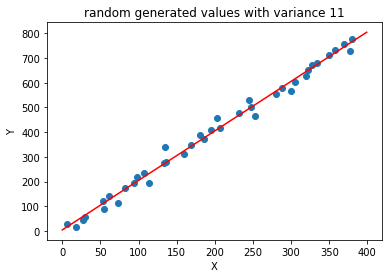

In [22]:
%matplotlib inline
import random
import matplotlib.pyplot as plt


# point generation
X = []
Y = []
for i in range(0,200, 5):
    X.append(i + random.gauss(i, 11))
    Y.append((i*3+5) + random.gauss(i, 11))


# Compute m and b and compare with ground truth
m,b = linearRegression(zip(X,Y))

plt.title("random generated values with variance 11")
plt.xlabel("X")
plt.ylabel("Y")

# plot of origninal point
plt.scatter(X,Y)

# plot of regression
X = range(400)
Y = [ m*x + b for x in X]

plt.plot(X,Y, c='r')